|NAME	|	Age	|Gender	|CLASS OF SPORTS|
|----|-----|----|-------|
|Zaira|	34	|1	|Cricket|
|Sachin|	55|	0	|Neither|
|Rahul	|40	|0	|Cricket|
|Pooja	|20	|1	|Neither|
|Smith	|15	|0	|Cricket|
|Laxmi	|55	|1	|Football|
|Michael|	15|	0	|Football|

The distance between two points (x₁, y₁) and (x₂, y₂) in a two-dimensional Cartesian coordinate system can be calculated using the Euclidean distance formula:

d = √((x₂ - x₁)² + (y₂ - y₁)²)

In this formula, d represents the distance between the two points, (x₁, y₁) and (x₂, y₂), and the expression inside the square root calculates the squared differences between their respective x and y coordinates. Finally, taking the square root of this expression gives you the Euclidean distance between the two points.


d=√((age2-age1)²+(gender2-gender1)²)

d=√((5-32)²+(1-0)²)

d=√729+1

d=27.02

In [ ]:
import numpy as np

In [ ]:
Age=np.array([34,55,40,20,15,55,15])
Gender=np.array([1,0,0,1,0,1,0])
Labels=np.array(['c','n','c','n','c','f','f'])

In [ ]:
#now if we have a new data point that we want to predict its label according to k=3 nearset neighbours, the new point age=50, gender=0.

# Step 1: Calculate Euclidean Distance
def euclidean_distance(point1, point2):
    # Write the code to calculate the euclidean distance between the two points
    # Your code here

    return np.sqrt(np.sum((point1 - point2) ** 2))

# Step 2: Get k Nearest Neighbours
def get_neighbours(training_data, test_point, k):
    distances = []
    for index in range(len(training_data)):
        dist = euclidean_distance(test_point, training_data[index])
        distances.append((index, dist))
    distances.sort(key=lambda x: x[1])
    # Assign the first (k) distances to neighbours variable before returning it
    # Your code here

    neighbours=distances[0:k]
    return neighbours

# Step 3: Predict the label
def predict_label(training_labels, neighbours):
    labels = [training_labels[i[0]] for i in neighbours]
    # Assign the label with majority voting to the "prediction" variable
    # Your code here

    prediction = max(set(labels), key=labels.count)
    return prediction

# Combine Age and Gender for training data
training_data = np.column_stack((Age, Gender))

# Example: Predict the label for a new data point
new_data_point = np.array([30, 1])  # Example new data point [Age, Gender]
k = 5  # Number of neighbours

# Get the k nearest neighbours
neighbours = get_neighbours(training_data, new_data_point, k)

# Predict the label for the new data point
predicted_label = predict_label(Labels, neighbours)
print(f"The predicted label for the new data point {new_data_point} is: {predicted_label}")


The predicted label for the new data point [30  1] is: c


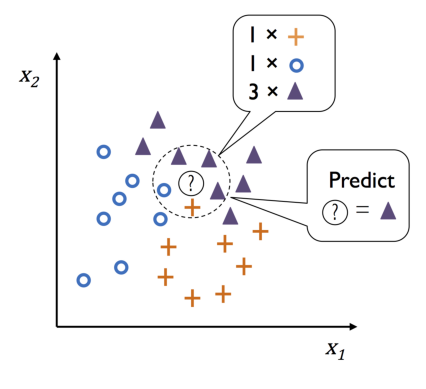

In [ ]:
# Loading an image and displaying it

import cv2
import matplotlib.pyplot as plt

img = cv2.imread('03_23.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()

## Package version checks

Add folder to path in order to load from the check_packages.py script:

In [ ]:
from IPython.display import Image
%matplotlib inline

# Choosing a classification algorithm

...

# First steps with scikit-learn

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower examples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

![image.png](attachment:image.png)

![image.png](attachment:image.png)


Splitting data into 70% training and 30% test data:

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Step 1: Read and Load Data
# The Iris dataset is available in scikit-learn, but we can load it from the UCI Machine Learning Repository.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv(url, names=column_names)

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


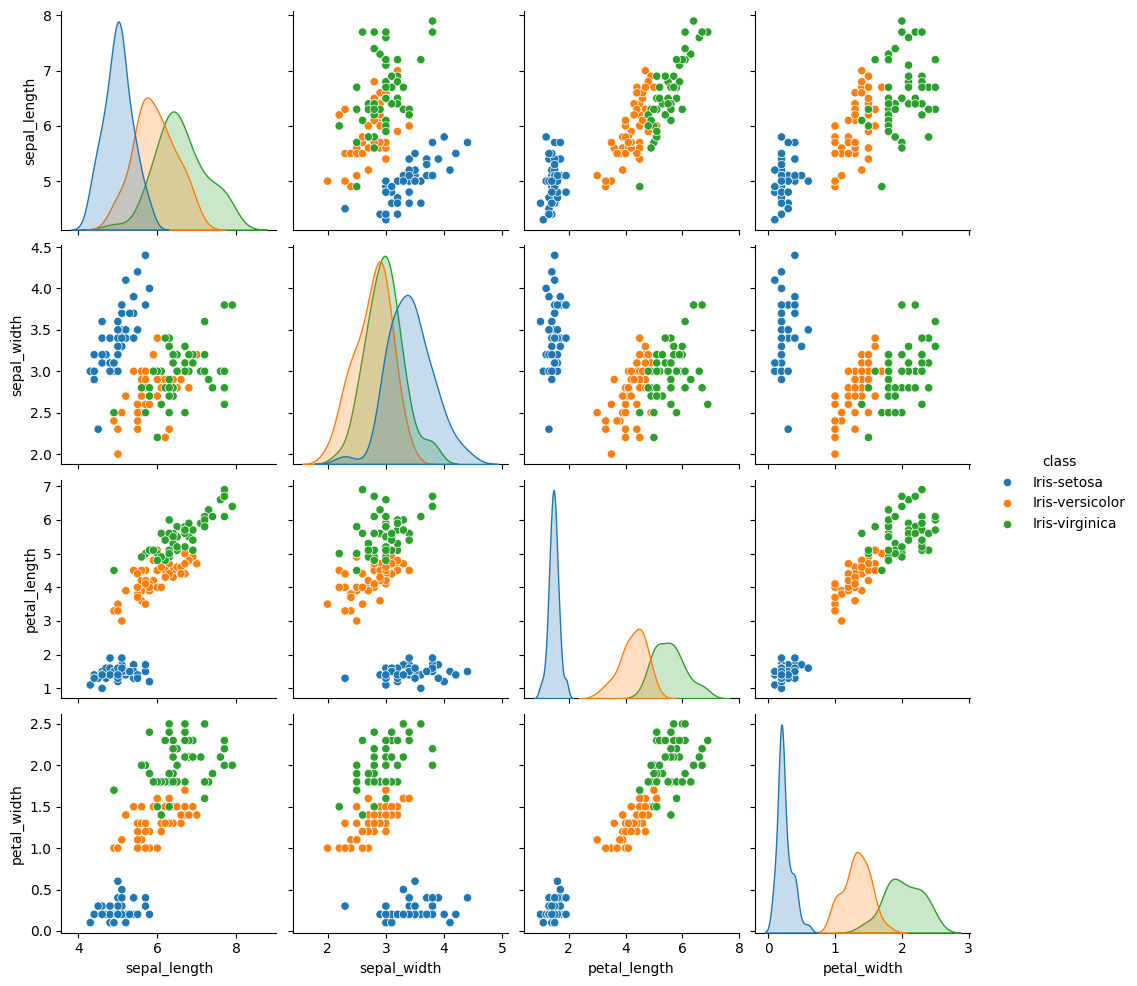

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a pairplot
sns.pairplot(data, hue="class")
plt.show()

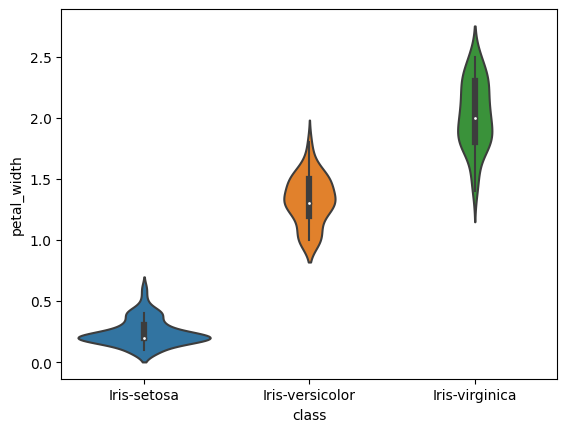

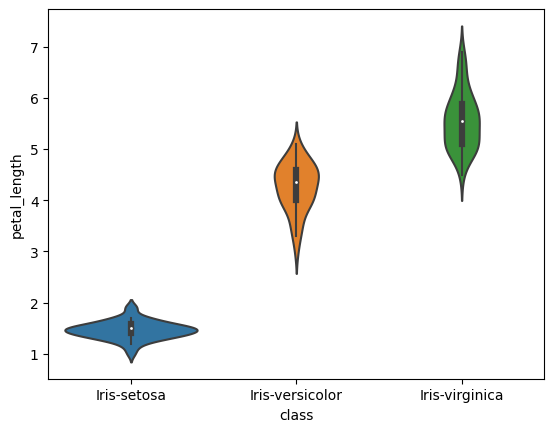

In [ ]:
# Create a violin plot
sns.violinplot(x="class", y="petal_width", data=data)

plt.show()
sns.violinplot(x="class", y="petal_length", data=data)
plt.show()

In [ ]:
# Display the first few rows of the dataset
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Standardizing the features:

In [ ]:
# Step 2: Preprocess Data
# Split the data into features (X) and target (y)
X = data.iloc[:, :4]  # Features: sepal_length, sepal_width, petal_length, petal_width
y = data['class']
#y=data.iloc[:,-1]     # Target: Iris class


In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Standardize the features by scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Step 3: Build and Train the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=51)  # Create a KNN classifier with k=3
knn.fit(X_train, y_train)                  # Train the model

# Step 4: Make Predictions
y_pred = knn.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 84.44%


## Another Example

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
data = pd.DataFrame(data=np.c_[wine['data'], wine['target']],
                    columns=wine['feature_names'] + ['target'])

In [ ]:
data.target.unique()

array([0., 1., 2.])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
data.alcohol.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Name: alcohol, Length: 178, dtype: bool

In [ ]:
data[data.alcohol.isna()]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target


In [ ]:
# Introduce missing values
X = data.drop('target', axis=1)  # Features
y = data['target']             # Target

np.random.seed(42)
missing_mask = np.random.rand(*X.shape) < 0.1  # Introduce missing values with 10% probability
data_with_missing = X.copy()
data_with_missing[missing_mask] = np.nan

# Display the first few rows of the dataset with missing values
data_with_missing.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,NaN,0.28,2.29,5.64,NaN,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,NaN,101.0,2.80,NaN,0.30,2.81,5.68,1.03,NaN,1185.0
3,14.37,1.95,2.50,NaN,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,NaN,2.80,NaN,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
data_with_missing[data_with_missing.alcohol.isna()]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
16,NaN,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280.0
23,NaN,NaN,2.52,17.8,95.0,2.48,2.37,0.26,1.46,3.93,1.09,3.63,NaN
24,NaN,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0
29,NaN,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0
50,NaN,1.73,2.04,12.4,92.0,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150.0
72,NaN,1.66,2.24,24.0,87.0,1.88,1.84,0.27,1.03,NaN,0.98,2.78,472.0
100,NaN,2.08,NaN,17.5,97.0,2.23,2.17,0.26,1.40,3.30,NaN,2.96,710.0
103,NaN,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,NaN,2.44,415.0
107,NaN,1.75,2.28,22.5,84.0,1.38,1.76,0.48,1.63,3.30,0.88,NaN,488.0
132,NaN,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,NaN,0.66,1.36,560.0


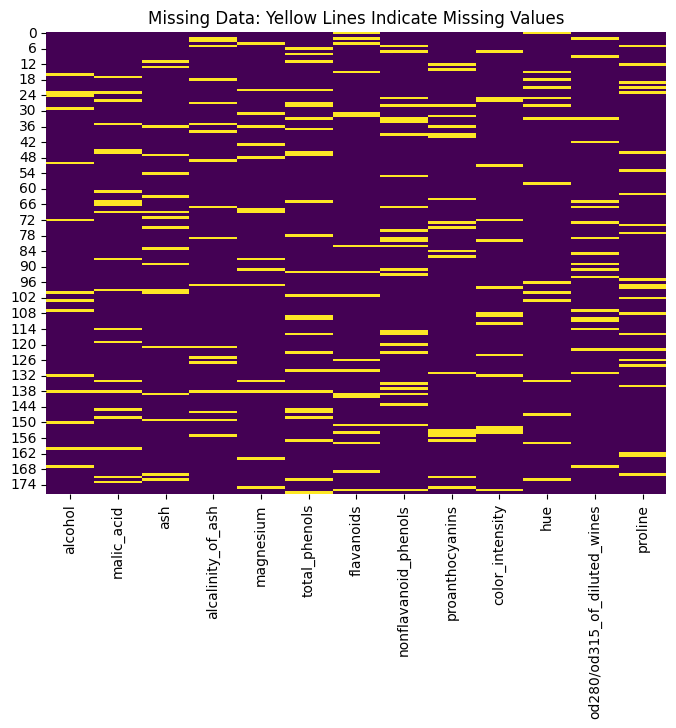

In [ ]:
# Explore missing data using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data_with_missing.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data: Yellow Lines Indicate Missing Values')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_with_missing, y, test_size=0.3, random_state=42)

# Impute missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [ ]:
# Standardize the features by scaling
scaler = StandardScaler()
X_train_imputed = scaler.fit_transform(X_train_imputed)
X_test_imputed = scaler.transform(X_test_imputed)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_imputed, y_train)
y_pred = knn.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8703703703703703

In [ ]:
y_train

138    2.0
104    1.0
78     1.0
36     0.0
93     1.0
      ... 
71     1.0
106    1.0
14     0.0
92     1.0
102    1.0
Name: target, Length: 124, dtype: float64

Best K: 20, Accuracy: 98.15%


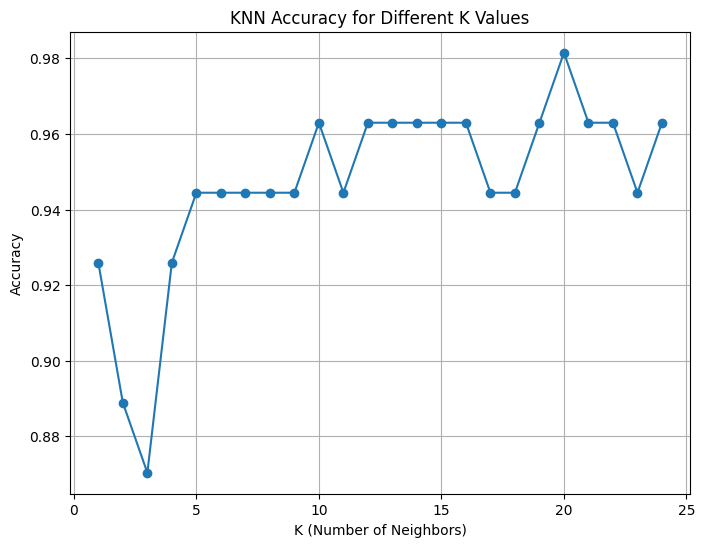

In [ ]:
k_values = list(range(1, 25))
accuracies = []
best_k = 0
best_accuracy = 0
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_imputed, y_train)
    y_pred = knn.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best K: {best_k}, Accuracy: {best_accuracy * 100:.2f}%")

# Plot the accuracy for different K values
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN Accuracy for Different K Values')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Task

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

# Load the Breast Cancer dataset
data = load_breast_cancer(as_frame=True)
df = data.frame
df['target'] = data.target

# Display the first few rows of the dataset
## ADD your code

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('target', axis=1) # Features
y = df['target']              # Target

# Split the data into training and testing sets
# add your code

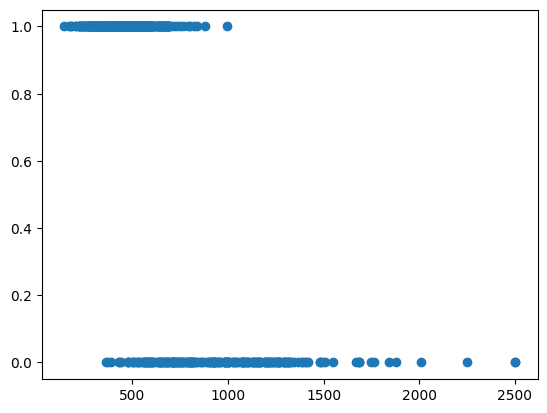

In [ ]:
#plot the data in any way you prefer


In [ ]:
#check the Na using plotting

In [ ]:
# Impute missing values with mean imputation, if there is na
imputer = SimpleImputer(strategy='median')
#X_train_imputed = imputer.fit_transform()
#X_test_imputed = imputer.transform()


In [ ]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
#X_train_imputed_scaled = scaler.fit_transform()#fit your data
#X_test_imputed_scaled =scaler.transform()#transform test data


In [ ]:
# Create a KNN classifier with k=5 and train it
#knn = KNeighborsClassifier(n_neighbors=2)#build you model, by hand or by plotting and for loop
#knn.fit(X_train_imputed_scaled, y_train)


In [ ]:
# Make predictions on the test data


In [ ]:
# Evaluate the model
#accuracy = accuracy_score(#enter you code)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 96.49%
